<a href="https://colab.research.google.com/github/DineishVS/OIBSIP/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn import metrics

In [10]:
car = pd.read_csv("/content/CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.shape

(205, 26)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
 car = car.dropna()

In [17]:
car= car.drop_duplicates()

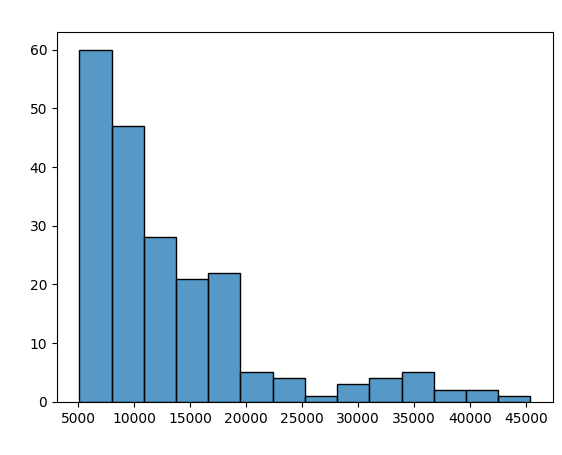

In [19]:
sns.histplot(car['price'])
plt.title('Distribution of Car Prices', color ='white')
plt.xlabel('Price', color = 'white')
plt.ylabel('Count', color ='white')

plt.show()

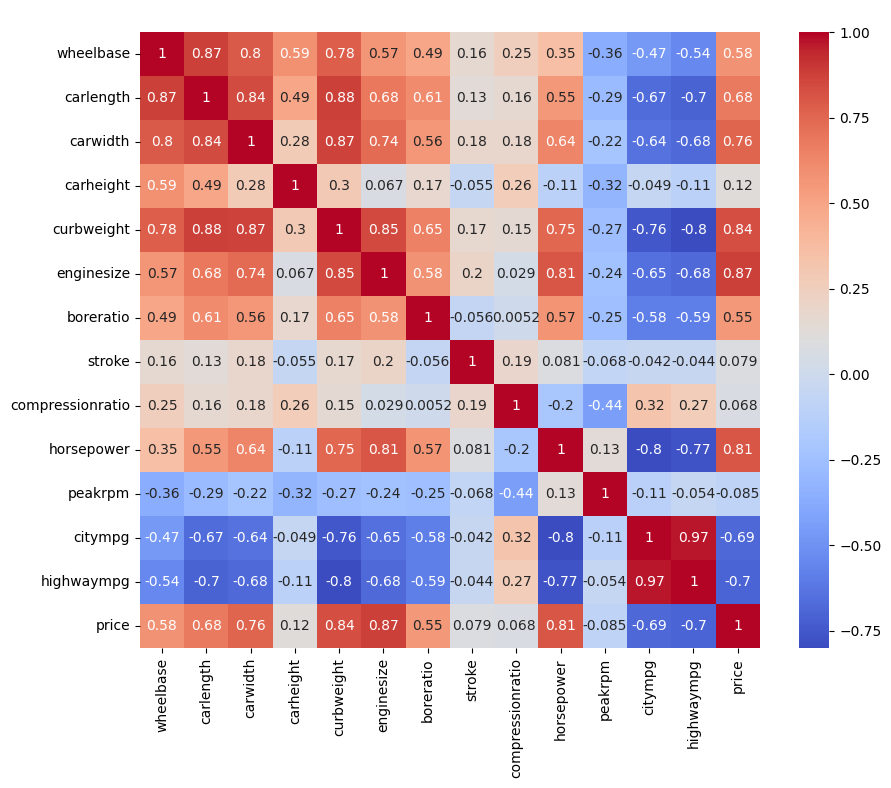

In [21]:
numeric_features = ['wheelbase','carlength','carwidth','carheight','curbweight',
                    'enginesize','boreratio','stroke','compressionratio',
                    'horsepower','peakrpm','citympg','highwaympg','price']
correlation_matrix = car[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot = True, cmap='coolwarm')
plt.title('CorrelationHeatmap', color= 'white')
plt.show()

In [24]:
feature_cols = ['symboling','fueltype','aspiration','doornumber',
                'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
                'carlength','carwidth', 'carheight','curbweight','enginetype',
                'cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio',
                'horsepower','peakrpm','citympg','highwaympg']

target_col = 'price'
x = car[feature_cols]
y = car[target_col]

In [26]:
label_encoder = LabelEncoder()
for col in x.columns:
  if x[col].dtype == 'object':
    x[col]= label_encoder.fit_transform(x[col])

<ipython-input-26-4c8c064b01bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]= label_encoder.fit_transform(x[col])
<ipython-input-26-4c8c064b01bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]= label_encoder.fit_transform(x[col])
<ipython-input-26-4c8c064b01bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:",  rmse)

Root Mean Squared Error: 3989.535026220401


In [33]:
new_car_data = [(3,'gas', 'std', 'two', 'sedan','fwd', 'front', 100.0, 100.0,68.0,
                 56.0,2500,'ohc', 'four',120,'npfil',3.50,2.80,8.5, 110,5500, 30, 38)]
new_car_df = pd.DataFrame(new_car_data, columns = feature_cols)
new_car_encoded = pd.get_dummies(new_car_df, drop_first = True)
new_car_encoded = new_car_encoded.reindex(columns = x_train.columns, fill_value=0)

predicted_price = model.predict(new_car_encoded)

print("predicted Price:", predicted_price)


predicted Price: [17100.21790667]
